In [2]:
import torch
from torchvision import transforms
from torchvision import datasets
from ModelToys import LinearModel
from torch.utils.data import DataLoader
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#transforms.ToTensor(1)
# TypeError: __init__() takes 1 positional argument but 3 were given
# 注意看， ToTensor是一个class，__init__只接收一个参数。默认会把自己当作self传入，如果再传1，就是给了2个参数


In [4]:
norm_transform = \
    transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# prepare data
train_data = datasets.MNIST("../data/", train=True, transform=norm_transform, download=False)
test_data_xy = datasets.MNIST("../data/", train=False, transform=norm_transform, download=False)
print(len(train_data))
print(train_data[0])
datasize = len(train_data)

60000
(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4

In [5]:
batch_size = 500
train_data_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers=4)
test_data_loader = DataLoader(dataset=test_data_xy, shuffle=True, num_workers=0)

In [6]:
# build model
model = LinearModel()

In [7]:
optim_f = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
loss_f = torch.nn.CrossEntropyLoss(size_average=True)


/Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [8]:
epoch = 50
loss_history = []
for i in range(epoch):
    curr_loss = 0
    for idx, data in enumerate(train_data_loader):
        data, target = data
        data = data.view(-1, 28 * 28)
        y_pred = model.forward(data)
        optim_f.zero_grad()
        loss = loss_f(y_pred, target)
        curr_loss = loss.item()
        loss.backward()
        optim_f.step()
        clear_output()
    loss_history.append(curr_loss)



/Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <870081F6-12FD-3CEA-BC5C-30F4764F2A98> /Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <F3CB84DE-97C1-34D2-AFB8-54D9DA60ADCD> /Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/luke/miniconda3/envs/demo/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/luke/

[2.2901771068573, 2.269449472427368, 2.205979585647583, 1.9264500141143799, 1.7764630317687988, 1.6086217164993286, 1.3934212923049927, 1.4314841032028198, 1.4681566953659058, 1.3695785999298096, 1.326235294342041, 1.3757548332214355, 1.3038115501403809, 1.3367244005203247, 1.2692128419876099, 1.27336847782135, 1.2390395402908325, 1.1627730131149292, 1.281949520111084, 1.1936391592025757, 1.2667529582977295, 1.2195676565170288, 1.3030816316604614, 1.3372483253479004, 1.2610546350479126, 1.2463265657424927, 1.2250089645385742, 1.2713357210159302, 1.275282621383667, 1.1279675960540771, 1.22373366355896, 1.209529995918274, 1.2702856063842773, 1.2075523138046265, 1.2703508138656616, 1.24998140335083, 1.131838321685791, 1.1974878311157227, 1.202835202217102, 1.2862629890441895, 1.1858206987380981, 1.136653184890747, 1.188106656074524, 1.1627912521362305, 1.1906007528305054, 1.183699369430542, 1.2045509815216064, 1.1623719930648804, 1.152624487876892, 1.2345571517944336]


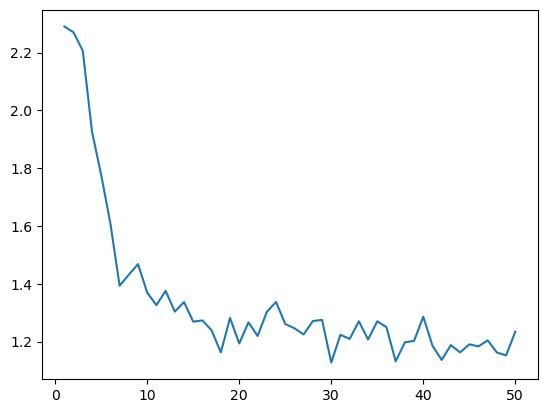

In [9]:
iteration = int(datasize / batch_size)

x = np.linspace(1, epoch, epoch)
print(loss_history)

plt.plot(x, loss_history)

In [10]:
correct = 0
total = 0

# 不需要计算梯度，可以节省内存和计算资源
with torch.no_grad():
    for inputs, labels in test_data_loader:
        # 计算模型输出
        outputs = model(inputs)

        # 获取预测结果（最大概率对应的类别）
        _, predicted = torch.max(outputs, 1)

        # 更新正确预测的数量和总样本数
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# 计算准确率
accuracy = 100 * correct / total
print(f"Test accuracy: {accuracy:.2f}%")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x512)